In [9]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [10]:
data = pd.read_csv('store_sale.csv')
data.head(5)

,date,store,item,sales
0,2013-01-01,1,1,13.0
1,2013-01-02,1,1,11.0
2,2013-01-03,1,1,14.0
3,2013-01-04,1,1,13.0
4,2013-01-05,1,1,10.0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664786 entries, 0 to 664785
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    664786 non-null  object 
 1   store   664786 non-null  int64  
 2   item    664786 non-null  int64  
 3   sales   664785 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 20.3+ MB


In [12]:
data = data.drop(['store','item'], axis=1)

In [13]:
data['date'] = pd.to_datetime(data['date'])
print(data['date'])

0        2013-01-01
1        2013-01-02
2        2013-01-03
3        2013-01-04
4        2013-01-05
            ...    
664781   2013-04-28
664782   2013-04-29
664783   2013-04-30
664784   2013-05-01
664785   2013-05-02
Name: date, Length: 664786, dtype: datetime64[ns]


In [14]:
data['date'] = data['date'].dt.to_period('M')
Month_sale = data.groupby('date').sum().reset_index()

In [15]:
Month_sale['date'] = Month_sale['date'].dt.to_timestamp()
Month_sale.head(5)

,date,sales
0,2013-01-01,347738.0
1,2013-02-01,351690.0
2,2013-03-01,471821.0
3,2013-04-01,521144.0
4,2013-05-01,583323.0


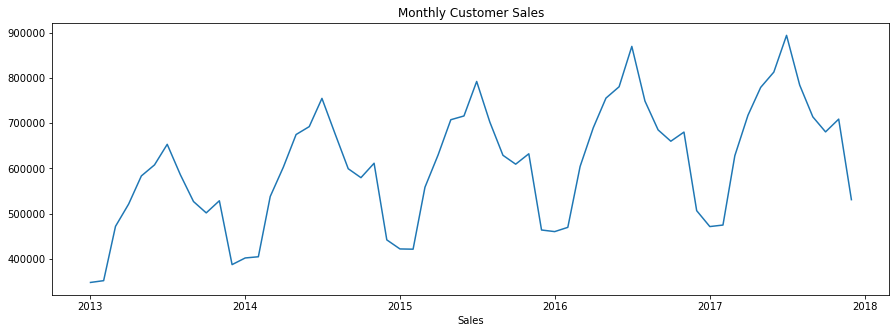

In [16]:
plt.figure(figsize=(15,5))
plt.plot(Month_sale['date'], Month_sale['sales'])
plt.xlabel('Date')
plt.xlabel('Sales')
plt.title("Monthly Customer Sales")
plt.show()

In [17]:
Month_sale['sales_diff'] = Month_sale['sales'].diff()
Month_sale = Month_sale.dropna()
Month_sale.head(5)

,date,sales,sales_diff
1,2013-02-01,351690.0,3952.0
2,2013-03-01,471821.0,120131.0
3,2013-04-01,521144.0,49323.0
4,2013-05-01,583323.0,62179.0
5,2013-06-01,607714.0,24391.0


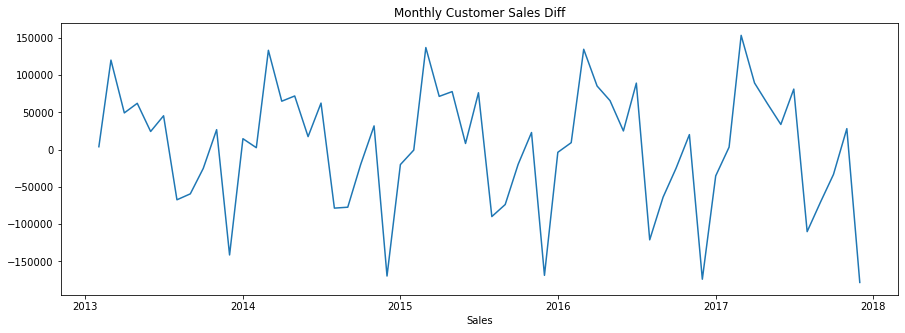

In [18]:
plt.figure(figsize=(15,5))
plt.plot(Month_sale['date'], Month_sale['sales_diff'])
plt.xlabel('Date')
plt.xlabel('Sales')
plt.title("Monthly Customer Sales Diff")
plt.show()

In [19]:
supverise = Month_sale.drop(['date','sales'], axis=1)


In [20]:
for i in range(1,13):
    col_name = 'month_' + str(i)
    supverise[col_name] = supverise['sales_diff'].shift(i)

In [22]:
supverise = supverise.dropna().reset_index(drop=True)
supverise.info()
supverise.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sales_diff  47 non-null     float64
 1   month_1     47 non-null     float64
 2   month_2     47 non-null     float64
 3   month_3     47 non-null     float64
 4   month_4     47 non-null     float64
 5   month_5     47 non-null     float64
 6   month_6     47 non-null     float64
 7   month_7     47 non-null     float64
 8   month_8     47 non-null     float64
 9   month_9     47 non-null     float64
 10  month_10    47 non-null     float64
 11  month_11    47 non-null     float64
 12  month_12    47 non-null     float64
dtypes: float64(13)
memory usage: 4.9 KB


,sales_diff,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,2651.0,14718.0,-141236.0,26840.0,-25125.0,-59254.0,-67228.0,45465.0,24391.0,62179.0,49323.0,120131.0,3952.0
1,133287.0,2651.0,14718.0,-141236.0,26840.0,-25125.0,-59254.0,-67228.0,45465.0,24391.0,62179.0,49323.0,120131.0
2,65019.0,133287.0,2651.0,14718.0,-141236.0,26840.0,-25125.0,-59254.0,-67228.0,45465.0,24391.0,62179.0,49323.0
3,72016.0,65019.0,133287.0,2651.0,14718.0,-141236.0,26840.0,-25125.0,-59254.0,-67228.0,45465.0,24391.0,62179.0
4,17497.0,72016.0,65019.0,133287.0,2651.0,14718.0,-141236.0,26840.0,-25125.0,-59254.0,-67228.0,45465.0,24391.0
5,62466.0,17497.0,72016.0,65019.0,133287.0,2651.0,14718.0,-141236.0,26840.0,-25125.0,-59254.0,-67228.0,45465.0
6,-78414.0,62466.0,17497.0,72016.0,65019.0,133287.0,2651.0,14718.0,-141236.0,26840.0,-25125.0,-59254.0,-67228.0
7,-77180.0,-78414.0,62466.0,17497.0,72016.0,65019.0,133287.0,2651.0,14718.0,-141236.0,26840.0,-25125.0,-59254.0
8,-19755.0,-77180.0,-78414.0,62466.0,17497.0,72016.0,65019.0,133287.0,2651.0,14718.0,-141236.0,26840.0,-25125.0
9,31888.0,-19755.0,-77180.0,-78414.0,62466.0,17497.0,72016.0,65019.0,133287.0,2651.0,14718.0,-141236.0,26840.0


In [23]:
train_data = supverise[:-12]
test_data = supverise[-12:]
print('Shape of the Train Data:', train_data.shape)
print('Shape of the Test Data:', test_data.shape)

Shape of the Train Data: (35, 13)
Shape of the Test Data: (12, 13)


In [25]:
scaler = MinMaxScaler(feature_range=(-1,1))
scaler.fit(train_data)

MinMaxScaler(feature_range=(-1, 1))

In [26]:
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

In [17]:
X_train, y_train = train_data[:,1:], train_data[:,0:1]
X_test, y_test = test_data[:,1:], test_data[:,0:1]
y_train = y_train.ravel()
y_test = y_test.ravel()
print('X_train Shape:', X_train.shape)
print('y_train Shape:', y_train.shape)
print('X_test Shape:', X_test.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (35, 12)
y_train Shape: (35,)
X_test Shape: (12, 12)
y_test Shape: (12,)


In [18]:
sales_dates = Month_sale['date'][-12:].reset_index(drop=True)
predict_df = pd.DataFrame(sales_dates)

In [20]:
act_sales = Month_sale['sales'][-13:].to_list()

In [21]:
linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)
linreg_pred = linreg_model.predict(X_test)

In [22]:
linreg_pred = linreg_pred.reshape(-1,1)
linreg_pred_test_set = np.concatenate([linreg_pred,X_test], axis=1)
linreg_pred_test_set = scaler.inverse_transform(linreg_pred_test_set)

In [23]:
result_list = []
for index in range(0, len(linreg_pred_test_set)):
    result_list.append(linreg_pred_test_set[index][0] + act_sales[index])
linreg_pred_series = pd.Series(result_list,name='linreg_pred')
predict_df = predict_df.merge(linreg_pred_series, left_index=True, right_index=True)

In [25]:
linreg_rmse = np.sqrt(mean_squared_error(predict_df['linreg_pred'], Month_sale['sales'][-12:]))
linreg_mae = mean_absolute_error(predict_df['linreg_pred'], Month_sale['sales'][-12:])
linreg_r2 = r2_score(predict_df['linreg_pred'], Month_sale['sales'][-12:])
print('Linear Regression RMSE: ', linreg_rmse)
print('Linear Regression MAE: ', linreg_mae)
print('Linear Regression R2 Score: ', linreg_r2)

Linear Regression RMSE:  13005.733970275469
Linear Regression MAE:  9864.608401293051
Linear Regression R2 Score:  0.9896517228377751


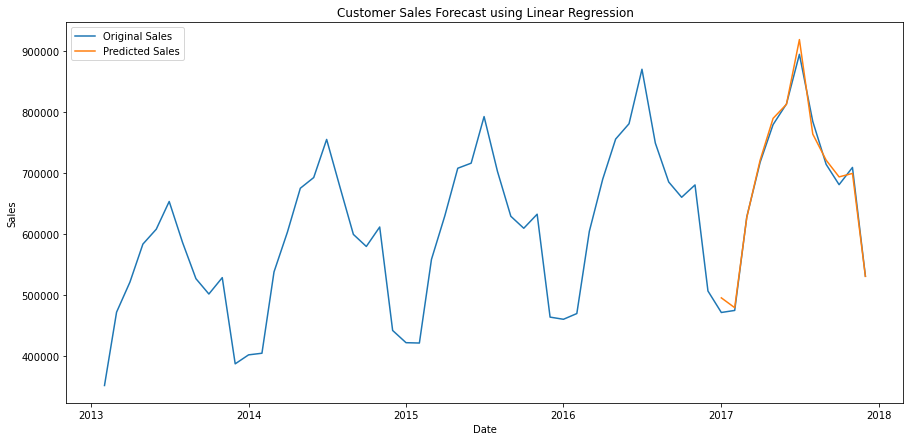

In [26]:
plt.figure(figsize=(15,7))
plt.plot(Month_sale['date'], Month_sale['sales'])
plt.plot(predict_df['date'], predict_df['linreg_pred'])
plt.title("Customer Sales Forecast using Linear Regression")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(["Original Sales", "Predicted Sales"])
plt.show()

In [27]:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=20)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [28]:
rf_pred = rf_pred.reshape(-1,1)
rf_pred_test_set = np.concatenate([rf_pred,X_test], axis=1)
rf_pred_test_set = scaler.inverse_transform(rf_pred_test_set)


In [29]:
result_list = []
for index in range(0, len(rf_pred_test_set)):
    result_list.append(rf_pred_test_set[index][0] + act_sales[index])
rf_pred_series = pd.Series(result_list, name='rf_pred')
predict_df = predict_df.merge(rf_pred_series, left_index=True, right_index=True)

In [31]:
rf_rmse = np.sqrt(mean_squared_error(predict_df['rf_pred'], Month_sale['sales'][-12:]))
rf_mae = mean_absolute_error(predict_df['rf_pred'], Month_sale['sales'][-12:])
rf_r2 = r2_score(predict_df['rf_pred'], Month_sale['sales'][-12:])
print('Random Forest RMSE: ', rf_rmse)
print('Random Forest MAE: ', rf_mae)
print('Random Forest R2 Score: ', rf_r2)

Random Forest RMSE:  13970.676791463084
Random Forest MAE:  11785.155833333343
Random Forest R2 Score:  0.9873590708988935


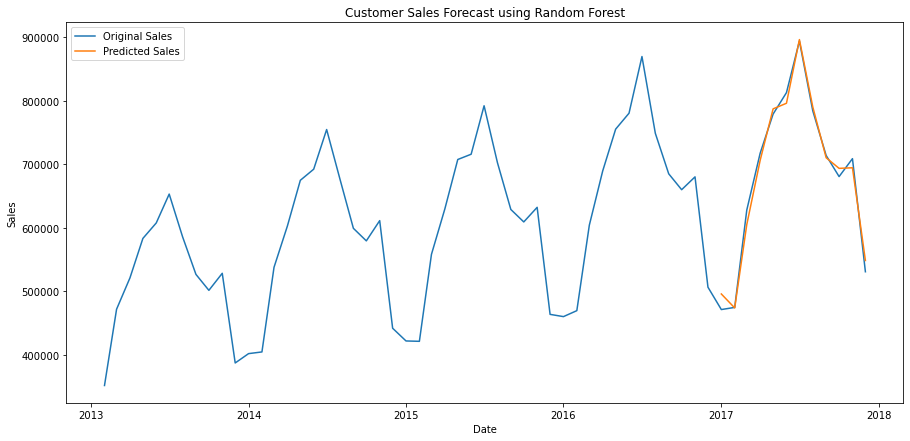

In [32]:
plt.figure(figsize=(15,7))
plt.plot(Month_sale['date'],Month_sale['sales'])
plt.plot(predict_df['date'], predict_df['rf_pred'])
plt.title("Customer Sales Forecast using Random Forest")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(["Original Sales", "Predicted Sales"])
plt.show()